In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 4

%matplotlib inline

plt.style.use('ggplot')

df = pd.read_csv('/Users/rajathanda/Downloads/#eweek2017.csv',encoding = 'ISO-8859-1', parse_dates=['tweet_created_at_date'],
                 infer_datetime_format=True,)
df1 = pd.read_csv('/Users/rajathanda/Downloads/#eweek2017r.csv',encoding = 'ISO-8859-1', parse_dates=['tweet_created_at_date'])

In [3]:
df1.columns

Index(['in_reply_to_status_id', 'in_reply_to_screen_name',
       'in_reply_to_user_id', 'retweet_count', 'favorite_count',
       'tweet_created_at_date', 'tweet_created_at_hour', 'tweet_id', 'text',
       'coordinates', 'name', 'screen_name', 'verified', 'friends_count',
       'followers_count', 'favourites_count', 'statuses_count', 'description',
       'profile_created_at_date', 'profile_created_at_hour', 'location',
       'user_id', 'profile_image_url_https',
       'profile_background_image_url_https', 'profile_banner_url',
       'external_url', 'external_media_type', 'external_media_url',
       'rt_in_reply_to_status_id', 'rt_in_reply_to_screen_name',
       'rt_in_reply_to_user_id', 'rt_retweet_count', 'rt_favorite_count',
       'rt_tweet_created_at_date', 'rt_tweet_created_at_hour', 'rt_tweet_id',
       'rt_text', 'rt_coordinates', 'rt_name', 'rt_screen_name', 'rt_verified',
       'rt_friends_count', 'rt_followers_count', 'rt_favourites_count',
       'rt_statuses_coun

In [4]:
#Tweet count
len(df.index)

6583

In [5]:
#Retweet count
len(df1.index)

10884

In [ ]:
sum(df.)

In [3]:
df2=df[['retweet_count','friends_count','favourites_count','statuses_count']]

In [131]:
df2.index

RangeIndex(start=0, stop=10884, step=1)

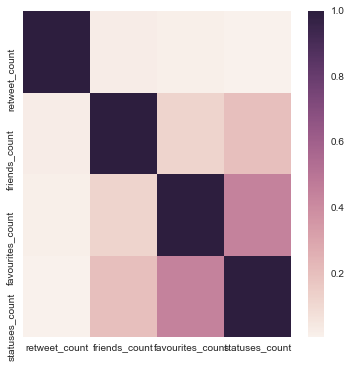

In [5]:
import seaborn as sns
corr = df2.corr()
plt.figure(figsize=(6, 6))

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [6]:
corr1=df2.corr()
map = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr1.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_precision(2)\

,retweet_count,friends_count,favourites_count,statuses_count
retweet_count,1,0.022,0.015,0.0054
friends_count,0.022,1,0.12,0.2
favourites_count,0.015,0.12,1,0.44
statuses_count,0.0054,0.2,0.44,1


In [7]:
time_series = pd.DataFrame(df['tweet_created_at_date'].value_counts().sort_index())
time_series2 = pd.DataFrame(df1['tweet_created_at_date'].value_counts().sort_index())

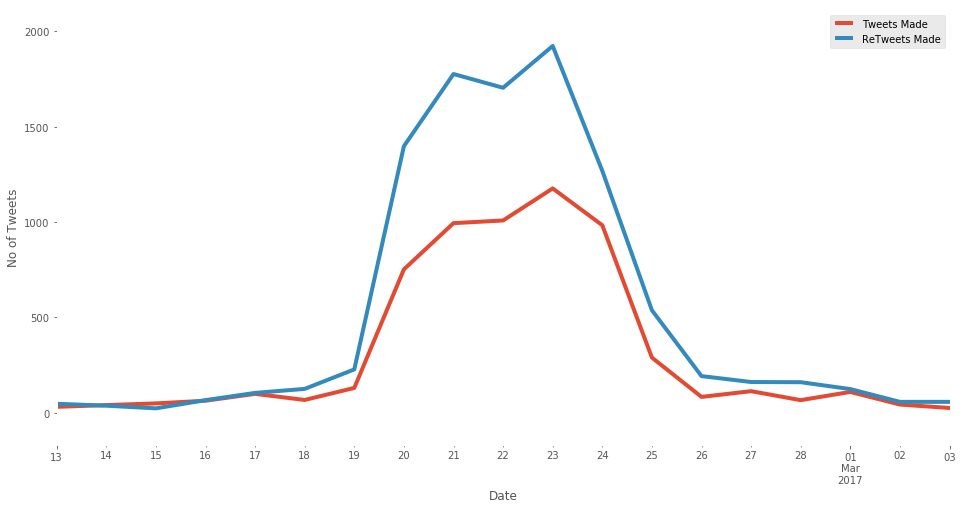

In [11]:
fig, ax = plt.subplots(figsize = (16,8))
time_series.loc[:'2017-03-03'].plot(ax = ax,label='continuous')

#time_series.rolling(window=7).mean().plot(ax = ax, linewidth = 2,color = 'k')
time_series2.loc[:'2017-03-03'].plot(ax = ax,label='continuous')
#time_series2.rolling(window=7).mean().plot(ax = ax, linewidth = 2,color = 'k',label='continuous')
ax.margins(None,0.1)
ax.legend(['Tweets Made','ReTweets Made','ReTweets Rolling 7 Day Mean',], loc = 'upper right', numpoints = 3)
ax.set_xlabel('Date')
ax.set_ylabel('No of Tweets')
ax.set_facecolor('white')

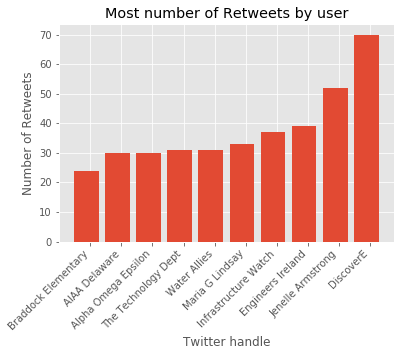

In [23]:
tweeterites = df1.groupby(['name']).count().reset_index()
tweeterites = tweeterites.sort_values(by='text').tail(10)
x = tweeterites['name']
y = tweeterites['text']
plt.xlabel('Twitter handle')
plt.ylabel('Number of Retweets')
plt.title('Most number of Retweets by user')

#plt.xticks(range(10), x, rotation=50)
h=plt.bar(range(10), y, label='Most Retweets by user')
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

plt.xticks(xticks_pos, x,  ha='right', rotation=45)
plt.figure(figsize=(15, 12))
plt.show()

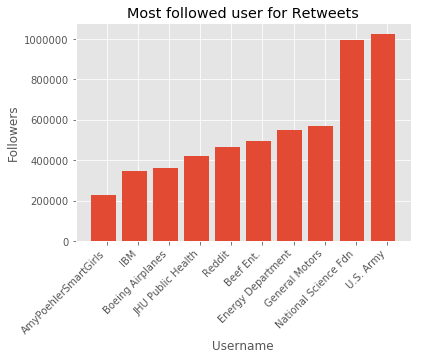

In [25]:
most_followed_users = df1.drop_duplicates('name', keep='last')
most_followed_users_top_10 = most_followed_users.sort_values(by='followers_count').tail(10)
x = most_followed_users_top_10['name']
y = most_followed_users_top_10['followers_count']
plt.xlabel('Username')
plt.ylabel('Followers')
plt.title('Most followed user for Retweets')
#plt.xticks(range(10), x, rotation=60)
h=plt.bar(range(10), y, label='Most followed user for retweets')
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

plt.xticks(xticks_pos, x,  ha='right', rotation=45)
plt.figure(figsize=(15, 12))
plt.show()


In [8]:
MyColumns = ['hashtag','cnt']
hashtagcount = pd.DataFrame(columns=MyColumns)

for index, row in df.iterrows():
    if '#' in row['text']:
        words = row['text'].lower()
        words = row['text'].split()
        for word in words:
            if word[0] == '#':
                hashtagcount.loc[len(hashtagcount)] = [word, 1]  # adding a row
                

In [13]:
hashtagcount.hashtag.nunique()

2330

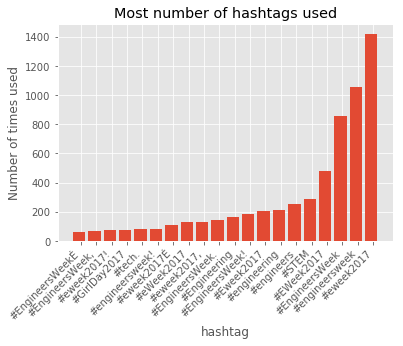

In [136]:
hashtags = hashtagcount.groupby(['hashtag']).count().reset_index()
hashtags = hashtags.sort_values(by='cnt').tail(20)

x = hashtags['hashtag']
y = hashtags['cnt']
plt.xlabel('hashtag')
plt.ylabel('Number of times used')
plt.title('Most number of hashtags used')
#plt.xticks(range(20), x, rotation=60)

h=plt.bar(range(20), y, label='Most hashtags used')
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

plt.xticks(xticks_pos, x,  ha='right', rotation=45)
plt.figure(figsize=(20, 20))
plt.show()

#h=plt.bar(range(20), y, label='Most hashtags used')
#plt.show()

In [37]:
words

'rt @stemxmpodcast: are you ready for #engineersweek coming up february 19th?  check out episode  16 of the stemxm podcast... #dreambig http\x83'

In [8]:
import langid

In [9]:
predicted_languages = [langid.classify(tweet) for tweet in df['text']]
lang_df = pd.DataFrame(predicted_languages, columns=['language','value'])

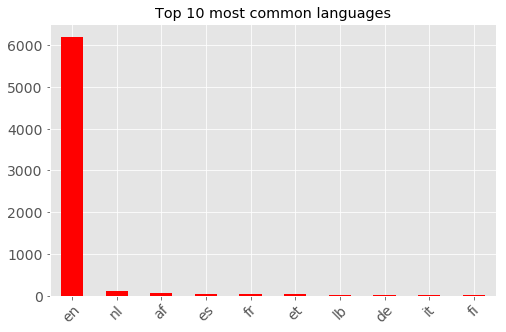

In [10]:
#Language predictors
pd.Series(lang_df['language']).value_counts().head(10).plot(kind = "bar",
                                                        figsize=(8,5),
                                                        color='red',
                                                        fontsize=14,
                                                        rot=45,
                                                        title = "Top 10 most common languages")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))



In [11]:
lang_df['language'].value_counts().head(10)

en    6208
nl     112
af      67
es      30
fr      25
et      25
lb      24
de      16
it       7
fi       6
Name: language, dtype: int64

In [13]:
#Other than english
ax=pd.Series(lang_df['language']).value_counts()[1:11].plot(kind = "bar",
                                                        figsize=(8,5),
                                                        color=colors,
                                                        fontsize=14,
                                                        rot=45,
                                                        title = "Top 10 most common languages other than english")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))



NameError: name 'colors' is not defined

In [5]:
import re
regex_str = [
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token.lower() for token in tokens]
    return tokens

In [16]:
urls = df["text"].map(lambda x: [url for url in preprocess(x, lowercase=True) if url.startswith('http:') or url.startswith('https:')])
urls = sum(urls, [])


In [19]:
len(set(urls))

6773

In [8]:
# Top20 URLS
import numpy as np
from collections import Counter
#Counter(urls).most_common(20)

In [12]:
# Top20 Hashtags
hashs = df["text"].map(lambda x: [hashs for hashs in preprocess(x, lowercase=True) if hashs.startswith('#')])
hashs = sum(hashs, [])
hashs[0:-5]

Counter(hashs).most_common()

[('#eweek2017', 2957),
 ('#engineersweek', 2678),
 ('#engineering', 442),
 ('#stem', 400),
 ('#engineers', 394),
 ('#girlday2017', 195),
 ('#engineer', 109),
 ('#tech', 97),
 ('#dreambig', 96),
 ('#nationalengineersweek', 81),
 ('#girlday', 50),
 ('#womeninstem', 48),
 ('#talentgap', 47),
 ('#dreambigfilm', 45),
 ('#eweek', 41),
 ('##eweek2017', 35),
 ('#womeninscience', 34),
 ('#job', 33),
 ('#reddit', 29),
 ('#tbt', 29),
 ('#wearelm', 27),
 ('#jhueweek', 27),
 ('#engweek17', 26),
 ('#engineeringweek', 25),
 ('#nibibfunded', 25),
 ('#steam', 24),
 ('#', 22),
 ('#_fkeliyim', 21),
 ('#girlsinstem', 20),
 ('#entrepreneurialmindset', 19),
 ('#siglerrad', 19),
 ('#hedgcoxelearns', 19),
 ('#education', 19),
 ('#sciencebasket17', 18),
 ('#dyk', 17),
 ('#worklifedesign', 17),
 ('#jobs', 16),
 ('#engineersweek2017', 16),
 ('#civilengineering', 16),
 ('#harriscorp', 16),
 ('#hh2ndgrade', 16),
 ('#robotics', 15),
 ('#womenintech', 15),
 ('#aiaa', 14),
 ('#engineersrock', 14),
 ('#stemcareers', 1

In [23]:
# Top20 Mentions
tags = df["text"].map(lambda x: [tag for tag in preprocess(x, lowercase=True) if tag.startswith('@')])
tags = sum(tags, [])
#tags[0:5]

new=Counter(tags).most_common(10)
new

[('@discovereorg', 217),
 ('@', 51),
 ('@engineerireland', 50),
 ('@uc_eweek', 45),
 ('@aoe_betatau', 31),
 ('@ascetweets', 30),
 ('@firstenergycorp', 30),
 ('@swetalk', 28),
 ('@nspe', 27),
 ('@kellyservices', 25)]

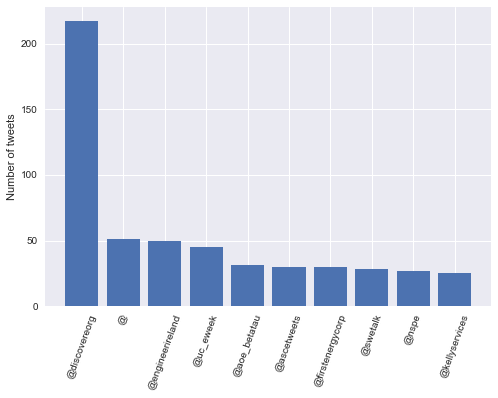

In [30]:
import numpy as np
import matplotlib.pyplot as plt

new.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*new))[0]
score = list(zip(*new))[1]
x_pos = np.arange(len(people)) 

# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)

plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people,rotation=70) 
plt.ylabel('Number of tweets')
plt.figure(figsize=(50,16))
plt.show()

In [ ]:
#WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

junk = re.compile("way|eweek2017é|new|engineersweeké|RT|\n|&.*?;|http[s](?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+)*")
tweets = [junk.sub(" ", t) for t in df.text]

vec = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=.5)
tfv = vec.fit_transform(tweets)

terms = vec.get_feature_names()
wc = WordCloud(height=1000, width=1000, max_words=30).generate(" ".join(terms))

plt.figure(figsize=(10, 10))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [35]:
summum_popularity = pd.DataFrame(df1.groupby('screen_name').followers_count.max())
small=500
mid=5000
big=20000
summum_popularity['starhood']='none'
summum_popularity.loc[summum_popularity.followers_count<small,'starhood']='small'
summum_popularity.loc[(summum_popularity.followers_count>small) & (summum_popularity.followers_count<mid),'starhood']='mid'
summum_popularity.loc[(summum_popularity.followers_count>mid) & (summum_popularity.followers_count<big),'starhood']='large'
summum_popularity.loc[(summum_popularity.followers_count>big),'starhood']='very large'


In [44]:
df1.set_index('screen_name', inplace=True)
df1['starhood']=summum_popularity.starhood
df1.reset_index(inplace=True)
df1.groupby('starhood').screen_name.unique().apply(lambda x: x.size)

starhood
large          350
mid           2266
none             5
small         5258
very large     169
Name: screen_name, dtype: int64

In [43]:
df.groupby('starhood').favourites_count.sum()

starhood
large         2054769
mid           5628025
none             3505
small         1625067
very large    1976938
Name: favourites_count, dtype: int64

In [45]:
df1.to_csv('/Users/rajathanda/Downloads/#rweeek2017.csv', encoding='utf-8')

In [27]:
df.count()

screen_name                           6583
in_reply_to_status_id                 6583
in_reply_to_screen_name               6583
in_reply_to_user_id                   6583
retweet_count                         6583
favorite_count                        6583
tweet_created_at_date                 6583
tweet_created_at_hour                 6583
tweet_id                              6583
text                                  6583
coordinates                           6583
name                                  6583
verified                              6583
friends_count                         6583
followers_count                       6583
favourites_count                      6583
statuses_count                        6583
description                           6583
profile_created_at_date               6583
profile_created_at_hour               6583
location                              6583
user_id                               6583
profile_image_url_https               6583
profile_bac

In [61]:
df[df['starhood']=='large']

,screen_name,in_reply_to_status_id,in_reply_to_screen_name,in_reply_to_user_id,retweet_count,favorite_count,tweet_created_at_date,tweet_created_at_hour,tweet_id,text,...,location,user_id,profile_image_url_https,profile_background_image_url_https,profile_banner_url,external_url,external_media_type,external_media_url,Unnamed: 28,starhood
11,UTC_CCS,null,null,null,0,2,2017-02-24,15:24:03,8.351483e+17,IÕm developing a controller for one of our chi...,...,null,2232071664,https://pbs.twimg.com/profile_images/652218837...,https://pbs.twimg.com/profile_background_image...,https://pbs.twimg.com/profile_banners/22320716...,https://twitter.com/i/web/status/8351482888358...,null,null,0.088383,large
20,MDDIonline,null,null,null,0,1,2017-02-23,00:56:26,8.345676e+17,Happy Engineers Week! #Engineersweek https://t...,...,"Los Angeles, CA",20275129,https://pbs.twimg.com/profile_images/460800443...,https://pbs.twimg.com/profile_background_image...,null,http://www.qmed.com/mpmn/gallery/10-medtech-en...,null,null,0.224929,large
35,science360,null,null,null,1,3,2017-02-22,18:31:10,8.344706e+17,These micro-sized sensors can self-diagnose an...,...,"Arlington, VA",79321561,https://pbs.twimg.com/profile_images/551498393...,https://pbs.twimg.com/profile_background_image...,https://pbs.twimg.com/profile_banners/79321561...,http://bit.ly/2m9uUq1,null,null,0.775748,large
37,OtisElevatorCo,null,null,null,1,2,2017-02-25,15:40:01,8.355147e+17,We strive to create simple solutions that wil...,...,null,558801260,https://pbs.twimg.com/profile_images/715167133...,https://pbs.twimg.com/profile_background_image...,https://pbs.twimg.com/profile_banners/55880126...,https://twitter.com/i/web/status/8355146953983...,null,null,0.866274,large
46,Black_Veatch,null,null,null,1,3,2017-02-21,17:15:02,8.340891e+17,Happy National Engineers Week! Black &amp; Vea...,...,null,24130235,https://pbs.twimg.com/profile_images/715924353...,https://pbs.twimg.com/profile_background_image...,https://pbs.twimg.com/profile_banners/24130235...,http://bit.ly/2kRYS00,null,null,0.294373,large
56,BurnsMcDonnell,null,null,null,4,17,2017-02-23,14:20:02,8.347698e+17,Women Engineers Share What They Love about The...,...,Offices Worldwide,144892029,https://pbs.twimg.com/profile_images/552100337...,https://pbs.twimg.com/profile_background_image...,https://pbs.twimg.com/profile_banners/14489202...,http://hubs.ly/H06qPVL0,null,null,0.828800,large
74,3D_Innovations,null,null,null,0,0,2017-02-22,19:10:01,8.344804e+17,"3 ways to encourage the students of today, ou...",...,"Honolulu, Hawaii",330548125,https://pbs.twimg.com/profile_images/142955681...,https://pbs.twimg.com/profile_background_image...,https://pbs.twimg.com/profile_banners/33054812...,http://bit.ly/2kLJ6IQ,null,null,0.777082,large
94,AMEConnect,null,null,null,1,1,2017-02-23,19:40:13,8.348504e+17,What are the key traits I should look for in a...,...,"Rolling Meadows, IL",69055994,https://pbs.twimg.com/profile_images/459013912...,https://pbs.twimg.com/profile_background_image...,https://pbs.twimg.com/profile_banners/69055994...,http://ow.ly/WSX3309i6ti,null,null,0.034908,large
117,DiscoverEorg,null,null,null,3,3,2017-02-24,18:17:02,8.351918e+17,Keep up the momentum of #eweek2017 &amp; #girl...,...,null,69082951,https://pbs.twimg.com/profile_images/466970614...,https://abs.twimg.com/images/themes/theme1/bg.png,https://pbs.twimg.com/profile_banners/69082951...,http://DiscoverE.org/GlobalMarathon,photo,https://pbs.twimg.com/media/C5cyfLWU4AAtliX.jpg,0.140502,large
136,hseas,null,null,null,0,1,2017-02-21,19:15:21,8.341193e+17,"Alumna Leah Gaffney '15, of @EdwardsLifesci, d...",...,"Cambridge, MA",236921052,https://pbs.twimg.com/profile_images/467393767...,https://abs.twimg.com/images/themes/theme1/bg.png,https://pbs.twimg.com/profile_banners/23692105...,http://hvrd.me/MItV309aFSA,null,null,0.672914,large


In [9]:
time_series_large = pd.DataFrame(df[df['starhood']=='large'].tweet_created_at_date.value_counts().sort_index())
time_series_mid = pd.DataFrame(df[df['starhood']=='mid'].tweet_created_at_date.value_counts().sort_index())
time_series_small = pd.DataFrame(df[df['starhood']=='small'].tweet_created_at_date.value_counts().sort_index())
time_series_vlarge = pd.DataFrame(df[df['starhood']=='very large'].tweet_created_at_date.value_counts().sort_index())
#time_series2 = pd.DataFrame(df1['tweet_created_at_date'].value_counts().sort_index())

In [13]:
time_series_small.value_counts

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [101]:
rtime_series_large = pd.DataFrame(df1[df1['starhood']=='large'].tweet_created_at_date.value_counts().sort_index())
rtime_series_mid = pd.DataFrame(df1[df1['starhood']=='mid'].tweet_created_at_date.value_counts().sort_index())
rtime_series_small = pd.DataFrame(df1[df1['starhood']=='small'].tweet_created_at_date.value_counts().sort_index())
rtime_series_vlarge = pd.DataFrame(df1[df1['starhood']=='very large'].tweet_created_at_date.value_counts().sort_index())
#time_series2 = pd.DataFrame(df1['tweet_created_at_date'].value_counts().sort_index())

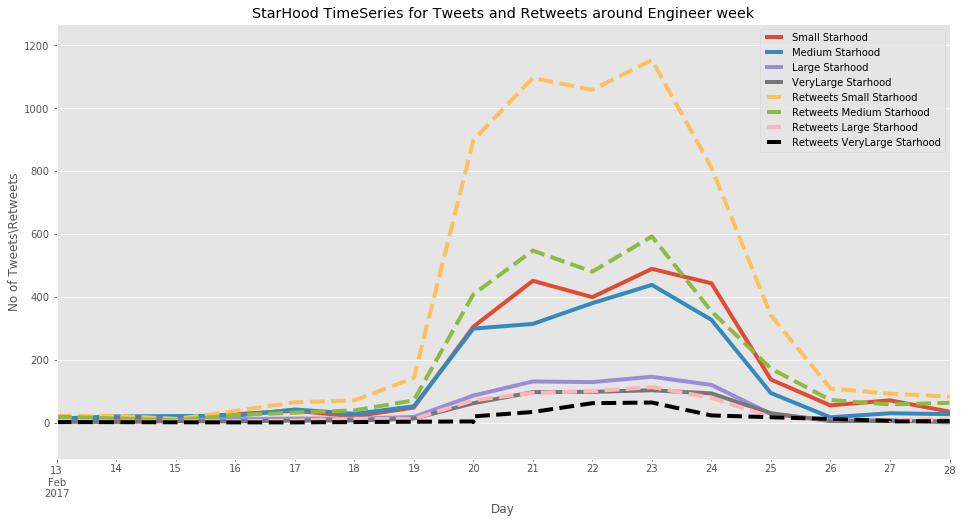

In [124]:
fig, ax = plt.subplots(figsize = (16,8))
time_series_small.loc[:'2017-02'].plot(ax = ax,label='continuous')
time_series_mid.loc[:'2017-02'].plot(ax = ax,label='continuous')
time_series_large.loc[:'2017-02'].plot(ax = ax,label='continuous')
time_series_vlarge.loc[:'2017-02'].plot(ax = ax,label='continuous')
rtime_series_small.loc[:'2017-02'].plot(ax = ax,label='continuous',linestyle='dashed')
rtime_series_mid.loc[:'2017-02'].plot(ax = ax,label='continuous',linestyle='dashed')
rtime_series_large.loc[:'2017-02'].plot(ax = ax,label='continuous',linestyle='dashed')
rtime_series_vlarge.loc[:'2017-02'].plot(ax = ax,label='continuous',linestyle='dashed',color='black')



#time_series.rolling(window=7).mean().plot(ax = ax, linewidth = 2,color = 'k')
#time_series2.plot(ax = ax,label='continuous')
#time_series2.rolling(window=7).mean().plot(ax = ax, linewidth = 2,color = 'k',label='continuous')
ax.margins(None,0.1)
ax.legend(['Small Starhood','Medium Starhood','Large Starhood','VeryLarge Starhood','Retweets Small Starhood','Retweets Medium Starhood','Retweets Large Starhood','Retweets VeryLarge Starhood'], loc = 'upper right', numpoints = 3)
ax.set_xlabel('Day')
ax.set_title('StarHood TimeSeries for Tweets and Retweets around Engineer week')
ax.set_ylabel('No of Tweets\Retweets')

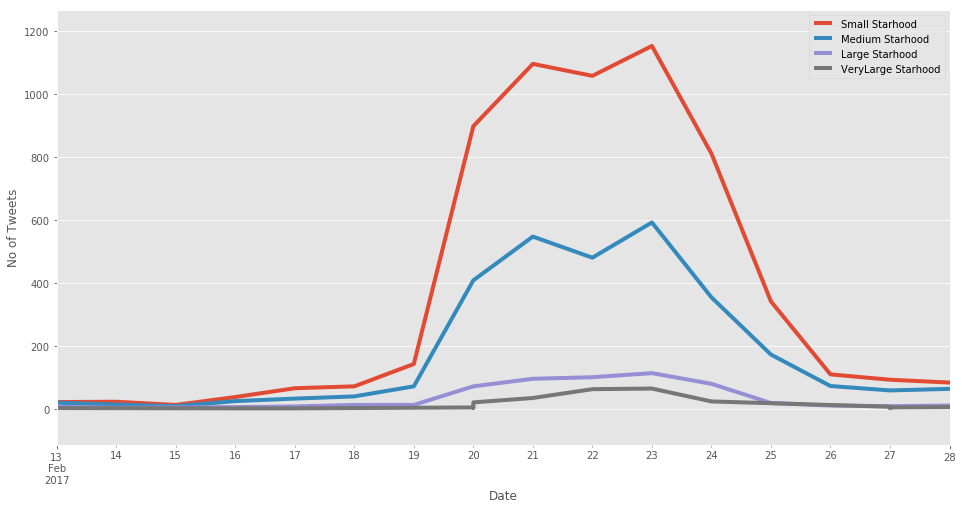

In [107]:
fig, ax1 = plt.subplots(figsize = (16,8))
rtime_series_small.loc[:'2017-02'].plot(ax = ax1,label='continuous')
rtime_series_mid.loc[:'2017-02'].plot(ax = ax1,label='continuous')
rtime_series_large.loc[:'2017-02'].plot(ax = ax1,label='continuous')
rtime_series_vlarge.loc[:'2017-02'].plot(ax = ax1,label='continuous')


#time_series.rolling(window=7).mean().plot(ax = ax, linewidth = 2,color = 'k')
#time_series2.plot(ax = ax,label='continuous')
#time_series2.rolling(window=7).mean().plot(ax = ax, linewidth = 2,color = 'k',label='continuous')
ax1.margins(None,0.1)
ax1.legend(['Small Starhood','Medium Starhood','Large Starhood','VeryLarge Starhood'], loc = 'upper right', numpoints = 3)
ax1.set_xlabel('Date')
ax1.set_ylabel('No of Tweets')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


vect2 = CountVectorizer(analyzer="word", min_df=2, decode_error="ignore", ngram_range=(2, 2), dtype=np.int32)

# applying Vectorizer to preprocessed tweets
sub21 = vect2.fit_transform(df.text)

# creating (word, count) list
sub22 = zip(vect2.get_feature_names(), np.asarray(sub21.sum(axis = 0)).ravel())

# getting Top20 words
sorted(sub22, key = lambda x: x[1], reverse = True)[0:100]

In [ ]:
import re
import nltk
nltk.download('stopwords')
word1=("NaN")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 6583):
    review = re.sub('[^a-zA-Z]', ' ', str(df['text'][i]))
    review = review.lower()
    review = review.split()
    review = ' '.join(review)
    corpus.append(review)



In [4]:
%pip install pygal

ERROR:root:Line magic function `%pip` not found.


In [12]:
!pip install plotly

In [13]:
%autoreload 2


In [14]:
import plotly.plotly as py

In [39]:
import re
regex_str = [
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
     r'http[s]?co+',
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token.lower() for token in tokens]
    return tokens

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vect4 = CountVectorizer(analyzer="word", min_df=2, decode_error="ignore", ngram_range=(4, 4), dtype=np.int32)

# applying Vectorizer to preprocessed tweets
sub41 = vect4.fit_transform(df["text"].map(lambda x: " ".join(preprocess(x, lowercase = True))).tolist())

# creating (word, count) list
sub42 = zip(vect4.get_feature_names(), np.asarray(sub41.sum(axis = 0)).ravel())

# getting Top20 words
sorted(sub42, key = lambda x: x[1], reverse = True)[30:70]

[('eweek2017 take look at', 47),
 ('how do we address', 47),
 ('in stem this eweek2017', 47),
 ('look at some strategies', 47),
 ('some strategies to close', 47),
 ('stem this eweek2017 take', 47),
 ('strategies to close it', 47),
 ('talentgap for women in', 47),
 ('the talentgap for women', 47),
 ('this eweek2017 take look', 47),
 ('to close it https', 47),
 ('we address the talentgap', 47),
 ('women in stem this', 47),
 ('girl to engineering day', 44),
 ('for eweek2017 https co', 39),
 ('happy engineersweek https co', 38),
 ('amp young women in', 34),
 ('during eweek2017 we highlight', 34),
 ('eweek2017 we highlight the', 34),
 ('highlight the importance of', 34),
 ('importance of role models', 34),
 ('models for girls amp', 34),
 ('of role models for', 34),
 ('role models for girls', 34),
 ('the importance of role', 34),
 ('we highlight the importance', 34),
 ('women in stem today', 33),
 ('young women in stem', 33),
 ('for girls amp young', 32),
 ('girls amp young women', 32),
 ('i

In [36]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


for i in range(0, 6583
              ):
    review = re.sub('[^a-zA-Z]', ' ', str(df['text'][i]))
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rajathanda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


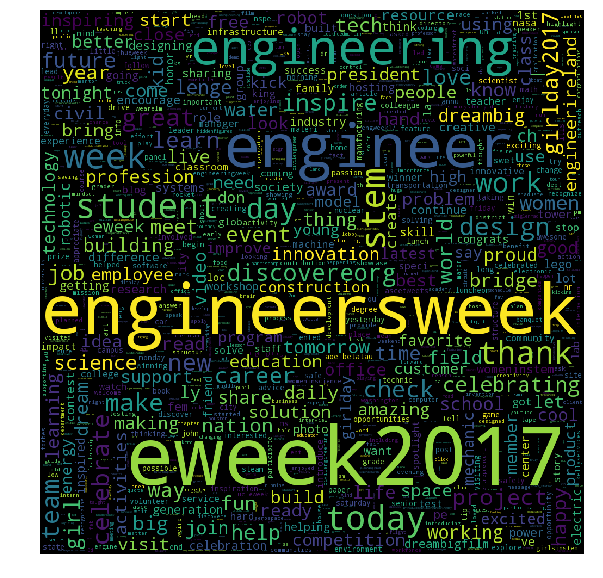

In [3]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

#df = pd.read_csv('/Users/rajathanda/Downloads/#eweek2017.csv')

junk = re.compile("al|RT|\n|&.*?;|http[s](?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+)*")
tweets = [junk.sub(" ", t) for t in df.text]

vec = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=.5)
tfv = vec.fit_transform(tweets)

terms = vec.get_feature_names()
wc = WordCloud(height=1000, width=1000, max_words=1000).generate(" ".join(terms))

plt.figure(figsize=(10, 10))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [6]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=10).fit(tfv)
for idx, topic in enumerate(nmf.components_):
    print("Topic #%d:" % idx)
    print(" ".join([terms[i] for i in topic.argsort()[:-4 - 1:-1]]))
    print("")

Topic #0:
changing world world tech engineers changing gifted engineers

Topic #1:
engineers week happy engineers week

Topic #2:
entgap address entgap look strategies strategies close

Topic #3:
idea starts idea idea tech starts

Topic #4:
celebrating engineersweek celebrating inspires engineersweek inspires

Topic #5:
young women role models importance role eweek2017 highlight

Topic #6:
tips eweek2017 celebrate eweek2017 check tips

Topic #7:
ensonunda vuruyon selviye ko o_lunu gùlen

Topic #8:
feb19 27 bioengineering innovative nibibfunded bioengineers bioengineers engineersweek

Topic #9:
reddit robotics engineer answering questions questions reddit



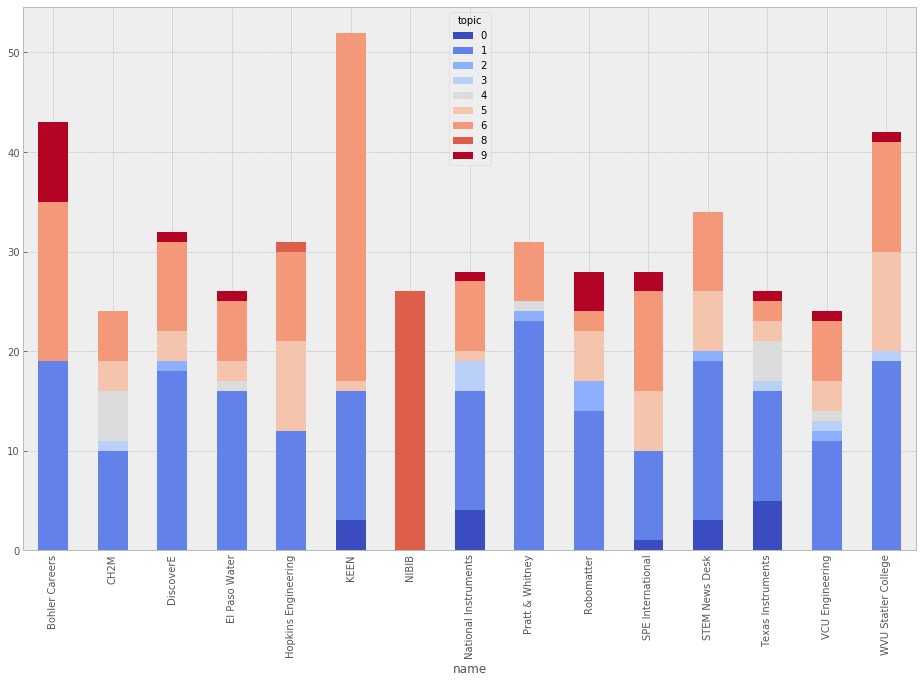

In [7]:
import numpy as np
from matplotlib import style

style.use('bmh')

df['topic'] = np.argmax(nmf.transform(vec.transform(tweets)), axis=1)
top10_users = df[df.name.isin(df.name.value_counts()[:15].keys().tolist())]
pd.crosstab(top10_users.name, top10_users.topic).plot.bar(stacked=True, figsize=(16, 10), colormap="coolwarm")

In [18]:
df3 = df.starhood.value_counts()

In [19]:
df3

mid           768
small         605
large         281
very large    212
Name: starhood, dtype: int64